<a href="https://colab.research.google.com/github/subashkatwal/PRODIGY_DS_05/blob/main/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap




Load the dataset

In [4]:
dataset= pd.read_csv('traffic_accident.csv', on_bad_lines = 'skip')

In [5]:
dataset.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


Using only required columns

In [85]:
new_dataset= dataset[['Road_Condition','Weather','Time_of_Day']]
filtered_dataset = new_dataset.dropna(subset=['Road_Condition', 'Weather', 'Time_of_Day'])
filtered_dataset.head()

,Road_Condition,Weather,Time_of_Day
0,Wet,Rainy,Morning
1,Wet,Clear,Night
2,Icy,Rainy,Evening
3,Under Construction,Clear,Afternoon
4,Dry,Rainy,Morning


# EDA: Analyzing the patterns

Exploring uniques values in the dataset

In [86]:
print(filtered_dataset['Road_Condition'].unique())
print(filtered_dataset['Weather'].unique())
print(filtered_dataset['Time_of_Day'].unique())

['Wet' 'Icy' 'Under Construction' 'Dry']
['Rainy' 'Clear' 'Foggy' 'Stormy' 'Snowy']
['Morning' 'Night' 'Evening' 'Afternoon']


#Analyzing the accidents caused by road conditions

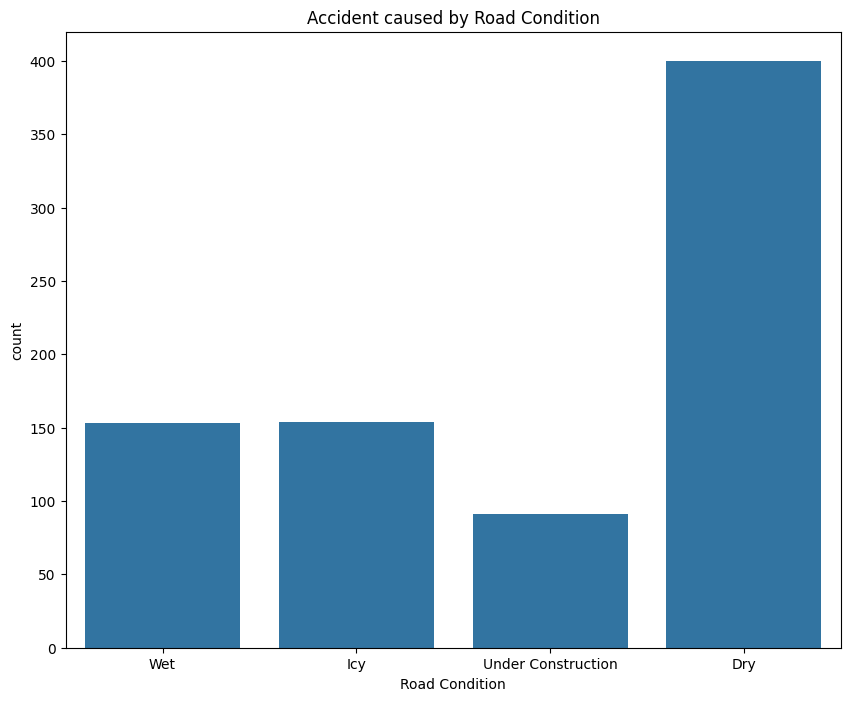

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(x='Road_Condition' ,data= new_dataset,order=['Wet','Icy','Under Construction','Dry'])
plt.title('Accident caused by Road Condition')
plt.xlabel('Road Condition')
plt.show()

#Accident Caused by the Wether Conditions




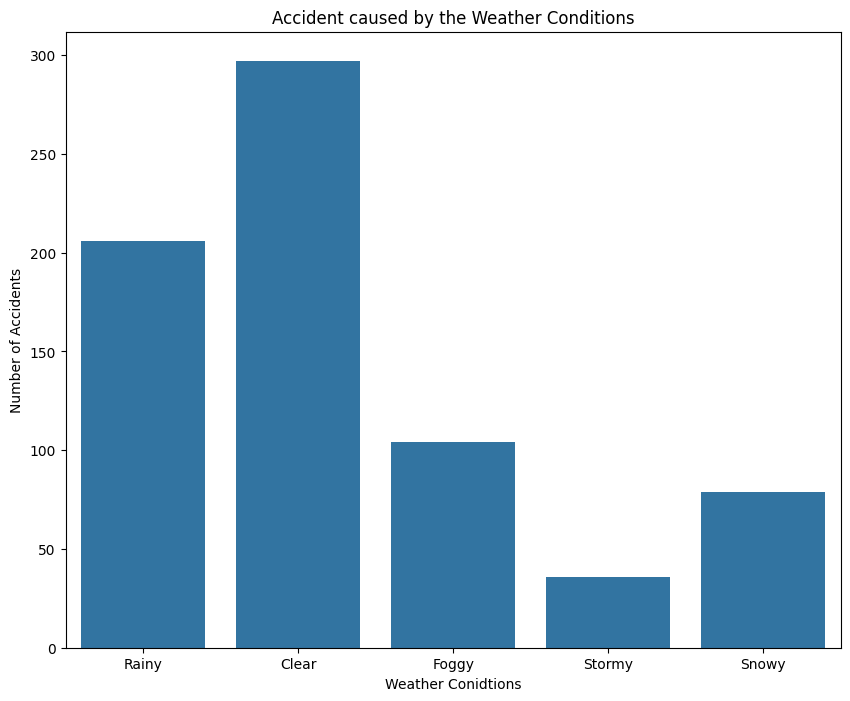

In [88]:
plt.figure(figsize=(10,8))
sns.countplot( x='Weather',data=filtered_dataset,order =['Rainy', 'Clear' ,'Foggy' ,'Stormy' ,'Snowy'])
plt.title('Accident caused by the Weather Conditions')
plt.xlabel('Weather Conidtions')
plt.ylabel('Number of Accidents')
plt.show()

#The time of day when the accident occurred

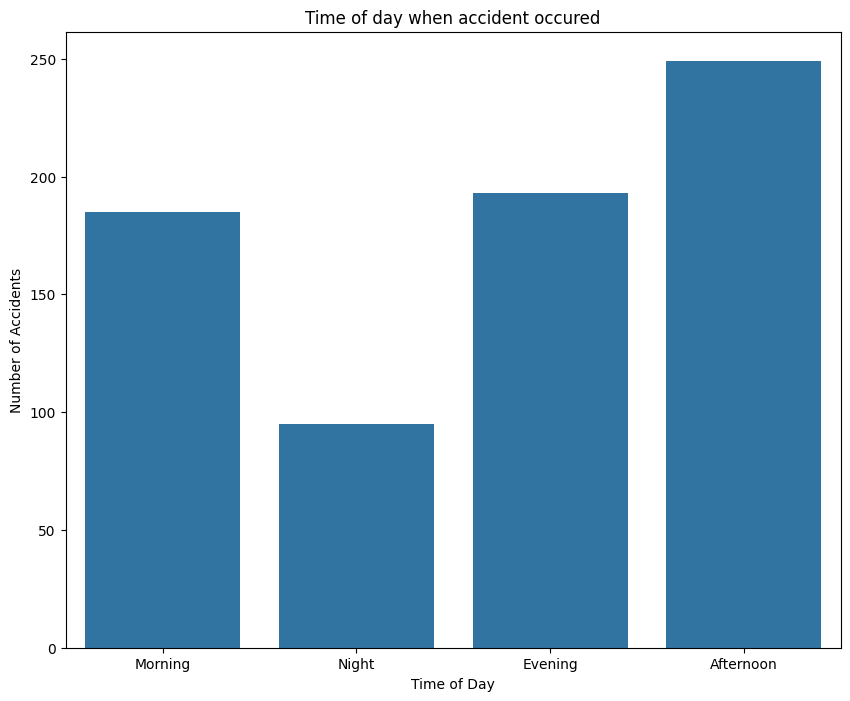

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(data= filtered_dataset, x = 'Time_of_Day', order= ['Morning' ,'Night', 'Evening', 'Afternoon'])
plt.title('Time of day when accident occured')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

To find frequent accident patterns


In [90]:
hotspot_patterns= filtered_dataset.groupby(['Road_Condition','Weather','Time_of_Day']).size().reset_index(name= 'Accident Count')

hotspot_patterns = hotspot_patterns.sort_values(by='Accident Count', ascending= False)
hotspot_patterns.head(10)

,Road_Condition,Weather,Time_of_Day,Accident Count
0,Dry,Clear,Afternoon,51
8,Dry,Rainy,Afternoon,41
1,Dry,Clear,Evening,41
2,Dry,Clear,Morning,38
10,Dry,Rainy,Morning,29
9,Dry,Rainy,Evening,26
3,Dry,Clear,Night,21
20,Icy,Clear,Afternoon,18
4,Dry,Foggy,Afternoon,18
61,Wet,Clear,Morning,18


# Visualize the Most Common Patterns

In [91]:
top_patterns = hotspot_patterns.head(10)
top_patterns['Combination'] = top_patterns.apply( lambda row: f"{row['Weather']}, {row['Road_Condition']}, {row['Time_of_Day']}", axis=1)

<ipython-input-91-6ed0ec4004b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_patterns['Combination'] = top_patterns.apply( lambda row: f"{row['Weather']}, {row['Road_Condition']}, {row['Time_of_Day']}", axis=1)


Plot the data

<ipython-input-92-704402cb2159>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accident Count', y='Combination', data=top_patterns, palette='viridis')


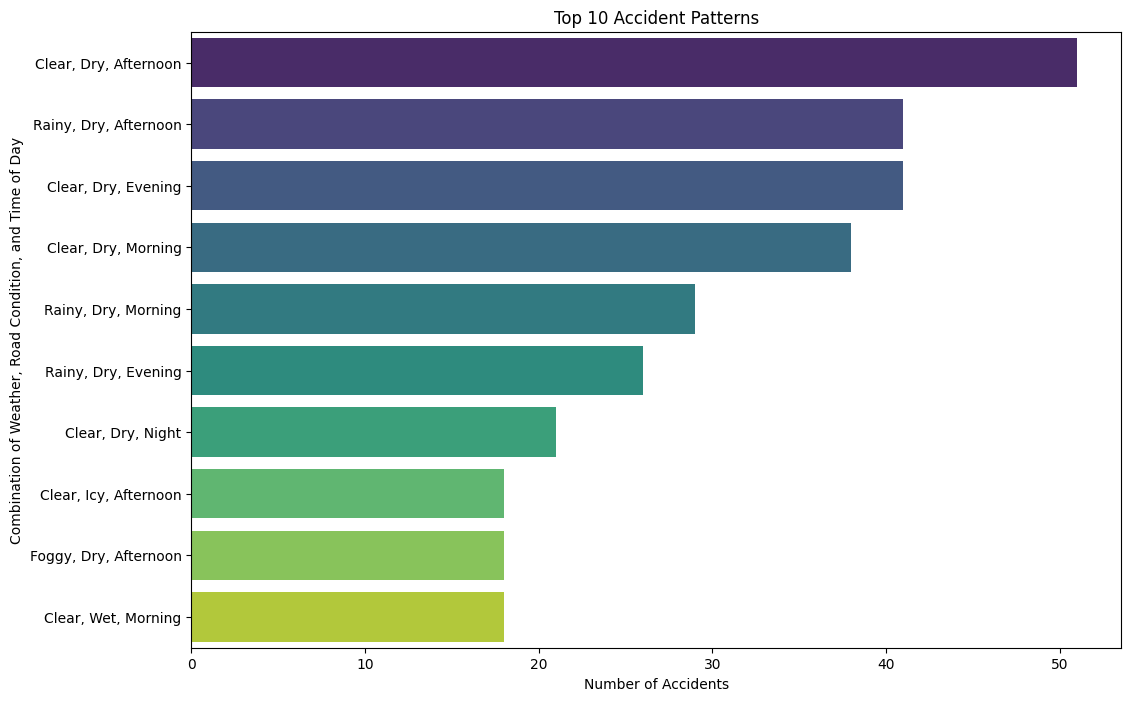

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Accident Count', y='Combination', data=top_patterns, palette='viridis')
plt.title('Top 10 Accident Patterns')
plt.xlabel('Number of Accidents')
plt.ylabel('Combination of Weather, Road Condition, and Time of Day')
plt.show()

# Heatmap for Accident Counts

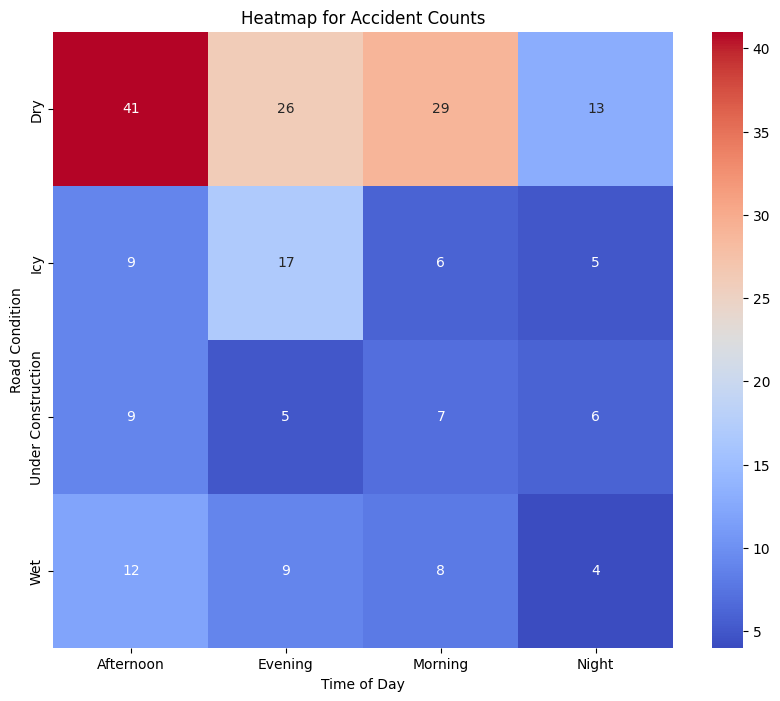

In [93]:
rainy_data= hotspot_patterns [hotspot_patterns['Weather']=='Rainy']
heatmap_data = rainy_data.pivot_table(
    values='Accident Count',
    index='Road_Condition',
    columns='Time_of_Day',
    aggfunc='sum',
    fill_value = 0
)

#Plotting the heatmap values
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot= True, fmt='d' , cmap = 'coolwarm')
plt.title('Heatmap for Accident Counts')
plt.xlabel('Time of Day')
plt.ylabel('Road Condition')
plt.show()